<a href="https://colab.research.google.com/github/v1b3m/PredictingDengueFever/blob/develop/dengue_fever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
testing_filepath = "drive/My Drive/DengueFever/Data/dengue_features_test.csv"
training_filepath = "drive/My Drive/DengueFever/Data/dengue_features_train.csv"
training_cases_filepath = "drive/My Drive/DengueFever/Data/dengue_labels_train.csv"

In [0]:
train = pd.read_csv(training_filepath, index_col='city')
cases = pd.read_csv(training_cases_filepath, index_col='city')
test = pd.read_csv(testing_filepath)

In [0]:
train.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,,,
sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
cases.head()

,year,weekofyear,total_cases
city,,,
sj,1990,18,4
sj,1990,19,5
sj,1990,20,4
sj,1990,21,3
sj,1990,22,6


In [0]:
train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [0]:
train.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [0]:
train = train.drop('week_start_date', axis=1)

### Data Cleaning
#### Check for missing data

In [0]:
y = cases.total_cases
X = train

In [0]:
from sklearn.model_selection import train_test_split
# Split data into training and testing data sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [0]:
X_train.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,,
iq,2009,22,0.238343,0.197317,0.165500,0.190143,40.04,296.704286,297.521429,296.264286,305.1,292.7,73.00,97.742857,40.04,17.830000,5.614286,27.600000,10.266667,34.4,21.0,19.3
iq,2007,35,0.278786,0.246357,0.234986,0.373743,30.26,300.667143,301.592857,293.124286,312.4,293.4,12.80,67.757143,30.26,14.794286,13.385714,27.050000,12.175000,34.7,19.9,0.0
sj,2003,21,NaN,0.004100,0.152614,0.124357,60.93,299.634286,299.707143,295.184286,301.5,298.0,13.76,76.704286,60.93,16.572857,2.328571,27.057143,6.771429,31.1,22.8,10.1
sj,2002,32,-0.000600,0.055100,0.251143,0.269657,39.52,301.002857,301.200000,296.742857,303.3,298.0,9.36,77.788571,39.52,18.201429,3.514286,28.471429,6.100000,32.2,25.0,3.6
sj,1995,4,0.051750,0.126800,0.177229,0.134071,0.00,297.592857,298.014286,293.532857,300.5,295.0,6.20,78.330000,0.00,14.947143,3.628571,26.128571,9.042857,32.8,20.6,9.9


In [0]:
y_train.head()

city
iq     2
iq     1
sj     7
sj     4
sj    46
Name: total_cases, dtype: int64

In [0]:
# Shape of training data
print(X_train.shape)

(1164, 22)


In [0]:
# Number of missing values in each column of training data
missing_value_count_for_training_data = (X_train.isnull().sum())
print(missing_value_count_for_training_data[missing_value_count_for_training_data > 0])

ndvi_ne                                  158
ndvi_nw                                   43
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                      12
reanalysis_air_temp_k                      9
reanalysis_avg_temp_k                      9
reanalysis_dew_point_temp_k                9
reanalysis_max_air_temp_k                  9
reanalysis_min_air_temp_k                  9
reanalysis_precip_amt_kg_per_m2            9
reanalysis_relative_humidity_percent       9
reanalysis_sat_precip_amt_mm              12
reanalysis_specific_humidity_g_per_kg      9
reanalysis_tdtr_k                          9
station_avg_temp_c                        37
station_diur_temp_rng_c                   37
station_max_temp_c                        17
station_min_temp_c                        13
station_precip_mm                         19
dtype: int64


In [0]:
# missing columns in validation data
missing_value_count_for_testing_data = (X_valid.isnull().sum())
print(missing_value_count_for_testing_data[missing_value_count_for_testing_data > 0])

ndvi_ne                                  36
ndvi_nw                                   9
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      1
reanalysis_air_temp_k                     1
reanalysis_avg_temp_k                     1
reanalysis_dew_point_temp_k               1
reanalysis_max_air_temp_k                 1
reanalysis_min_air_temp_k                 1
reanalysis_precip_amt_kg_per_m2           1
reanalysis_relative_humidity_percent      1
reanalysis_sat_precip_amt_mm              1
reanalysis_specific_humidity_g_per_kg     1
reanalysis_tdtr_k                         1
station_avg_temp_c                        6
station_diur_temp_rng_c                   6
station_max_temp_c                        3
station_min_temp_c                        1
station_precip_mm                         3
dtype: int64


WE shall use a random forest regressor and mean avaerage error to compare the different methods of handling missing values from data. We shall compute the mean average error obtained after applying a Random Forest Model on data obtained from each approach.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

The first approach we shall use will be imputing the data

In [0]:
cols_with_missing_data = [col for col in X_train.columns if X_train[col].isnull().any()]

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
si = SimpleImputer()

In [0]:
X_train.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,,
iq,2009,22,0.238343,0.197317,0.165500,0.190143,40.04,296.704286,297.521429,296.264286,305.1,292.7,73.00,97.742857,40.04,17.830000,5.614286,27.600000,10.266667,34.4,21.0,19.3
iq,2007,35,0.278786,0.246357,0.234986,0.373743,30.26,300.667143,301.592857,293.124286,312.4,293.4,12.80,67.757143,30.26,14.794286,13.385714,27.050000,12.175000,34.7,19.9,0.0
sj,2003,21,NaN,0.004100,0.152614,0.124357,60.93,299.634286,299.707143,295.184286,301.5,298.0,13.76,76.704286,60.93,16.572857,2.328571,27.057143,6.771429,31.1,22.8,10.1
sj,2002,32,-0.000600,0.055100,0.251143,0.269657,39.52,301.002857,301.200000,296.742857,303.3,298.0,9.36,77.788571,39.52,18.201429,3.514286,28.471429,6.100000,32.2,25.0,3.6
sj,1995,4,0.051750,0.126800,0.177229,0.134071,0.00,297.592857,298.014286,293.532857,300.5,295.0,6.20,78.330000,0.00,14.947143,3.628571,26.128571,9.042857,32.8,20.6,9.9


In [0]:
import numpy as np
imputed_X_train = pd.DataFrame(si.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(si.transform(X_valid))

In [0]:
imputed_X_train.columns = X_train.columns 
imputed_X_valid.columns = X_valid.columns 

In [0]:
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

13.803195205479453


In [0]:
from fancyimpute import SoftImpute

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
final_X_train = X_train.copy()
final_X_valid = X_valid.copy()

final_X_train = pd.DataFrame(SoftImpute().fit_transform(final_X_train))

[SoftImpute] Max Singular Value of X_init = 72058.655142
[SoftImpute] Iter 1: observed MAE=8.980520 rank=3
[SoftImpute] Iter 2: observed MAE=8.799186 rank=2
[SoftImpute] Iter 3: observed MAE=8.675319 rank=2
[SoftImpute] Iter 4: observed MAE=8.663553 rank=2
[SoftImpute] Iter 5: observed MAE=8.662910 rank=2
[SoftImpute] Iter 6: observed MAE=8.663080 rank=2
[SoftImpute] Iter 7: observed MAE=8.663195 rank=2
[SoftImpute] Stopped after iteration 7 for lambda=1441.173103


In [0]:
final_X_valid = pd.DataFrame(SoftImpute().fit_transform(final_X_valid))

[SoftImpute] Max Singular Value of X_init = 36093.350481
[SoftImpute] Iter 1: observed MAE=8.789059 rank=2
[SoftImpute] Iter 2: observed MAE=8.616256 rank=2
[SoftImpute] Iter 3: observed MAE=8.600540 rank=2
[SoftImpute] Iter 4: observed MAE=8.599405 rank=2
[SoftImpute] Iter 5: observed MAE=8.599454 rank=2
[SoftImpute] Iter 6: observed MAE=8.599520 rank=2
[SoftImpute] Iter 7: observed MAE=8.599550 rank=2
[SoftImpute] Stopped after iteration 7 for lambda=721.867010


In [0]:
imputed_X_train.columns = X_train.columns 

In [0]:
print(score_dataset(final_X_train, final_X_valid, y_train, y_valid))

14.148335616438358


In [0]:
train.columns.unique()

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [0]:
train.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,,
sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
print(train["year"].unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010]


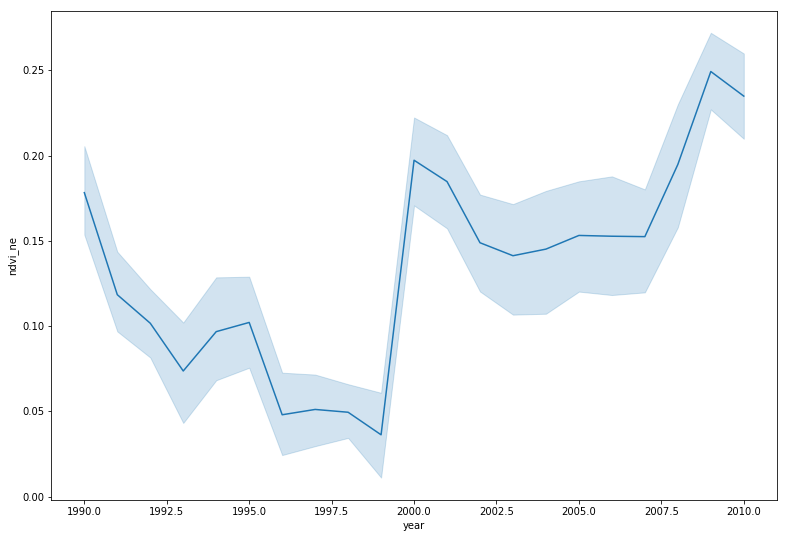

In [0]:
plt.figure(figsize=(13,9))
sns.lineplot(train["year"], train["ndvi_ne"])

In this approach, we use city, year and weekofyear as a multi index, and then we split up the week start date and use the year and month as features.

In [0]:
new_train = pd.read_csv(training_filepath, index_col=['city', 'year', 'weekofyear'])

In [0]:
new_train.head()

week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   1990 18              1990-04-30  ...               16.0
          19              1990-05-07  ...                8.6
          20              1990-05-14  ...               41.4
          21              1990-05-21  ...                4.0
          22              1990-05-28  ...                5.8

[5 rows x 21 columns]

In [0]:
new_train['year'] = pd.to_datetime(new_train.week_start_date).dt.year
new_train['month'] = pd.to_datetime(new_train.week_start_date).dt.month

In [0]:
new_train = new_train.drop('week_start_date', axis=1)

In [0]:
new_train.head()

ndvi_ne   ndvi_nw  ...  year  month
city year weekofyear                      ...             
sj   1990 18          0.122600  0.103725  ...  1990      4
          19          0.169900  0.142175  ...  1990      5
          20          0.032250  0.172967  ...  1990      5
          21          0.128633  0.245067  ...  1990      5
          22          0.196200  0.262200  ...  1990      5

[5 rows x 22 columns]

In [0]:
X = new_train

In [0]:
new_X_train, new_X_valid, new_y_train, new_y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [0]:
new_X_train.head()

ndvi_ne   ndvi_nw  ...  year  month
city year weekofyear                      ...             
iq   2009 22          0.238343  0.197317  ...  2009      5
     2007 35          0.278786  0.246357  ...  2007      8
sj   2003 21               NaN  0.004100  ...  2003      5
     2002 32         -0.000600  0.055100  ...  2002      8
     1995 4           0.051750  0.126800  ...  1995      1

[5 rows x 22 columns]

In [0]:
imputed_new_X_train = pd.DataFrame(si.fit_transform(new_X_train))
imputed_new_X_valid = pd.DataFrame(si.transform(new_X_valid))

imputed_new_X_train.columns = new_X_train.columns
imputed_new_X_valid.columns = new_X_valid.columns

In [0]:
imputed_new_X_train.head()